In [88]:
import pandas as pd  
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import matplotlib.pyplot as plt    
import seaborn as sns   
%matplotlib inline 

## Analyzing data

In [3]:
data = pd.read_csv("all_data.csv")

In [4]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Data Visualization 

/var/folders/zt/2bvp8n7961z0sp81p03ss1xc0000gn/T/ipykernel_42948/4264626273.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Life expectancy at birth (years)', data=data, palette='Blues')


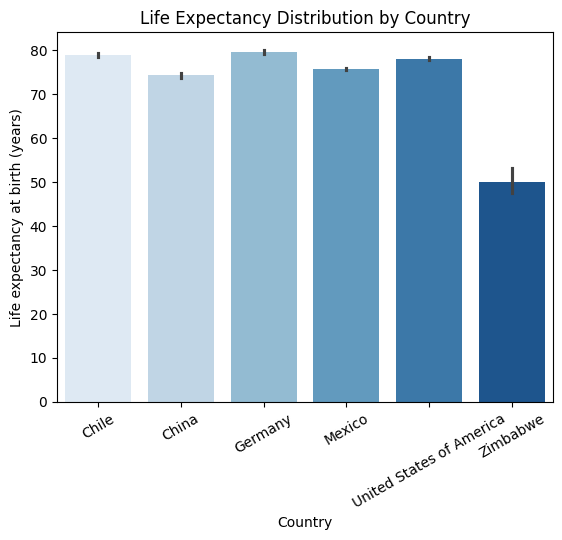

In [66]:
sns.barplot(x='Country', y='Life expectancy at birth (years)', data=data, palette='Blues')
plt.xticks( rotation = 30)
plt.title('Life Expectancy Distribution by Country')
plt.show()

/var/folders/zt/2bvp8n7961z0sp81p03ss1xc0000gn/T/ipykernel_42948/3794923485.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='GDP', data=data, palette='Greens')


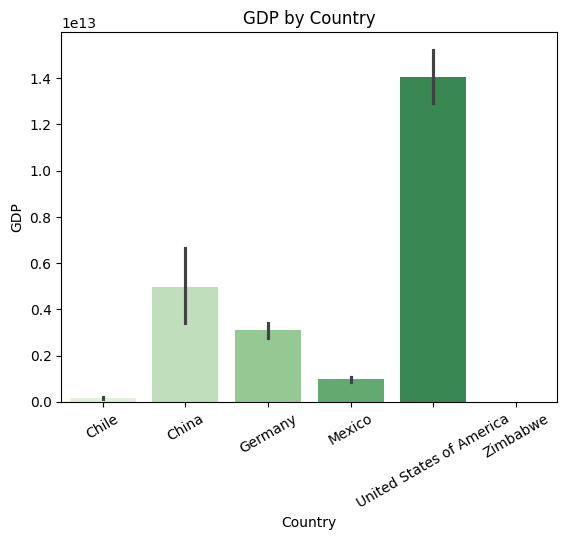

In [68]:
sns.barplot(x='Country', y='GDP', data=data, palette='Greens')
plt.xticks( rotation = 30)
plt.title('GDP by Country')
plt.show()

- The regression line indicates a positive relationship between GDP and Life Expectancy, meaning that as GDP increases, life expectancy tends to increase as well.
 The shaded area around the regression line represents the confidence interval, giving an idea of the uncertainty around the estimated relationship.


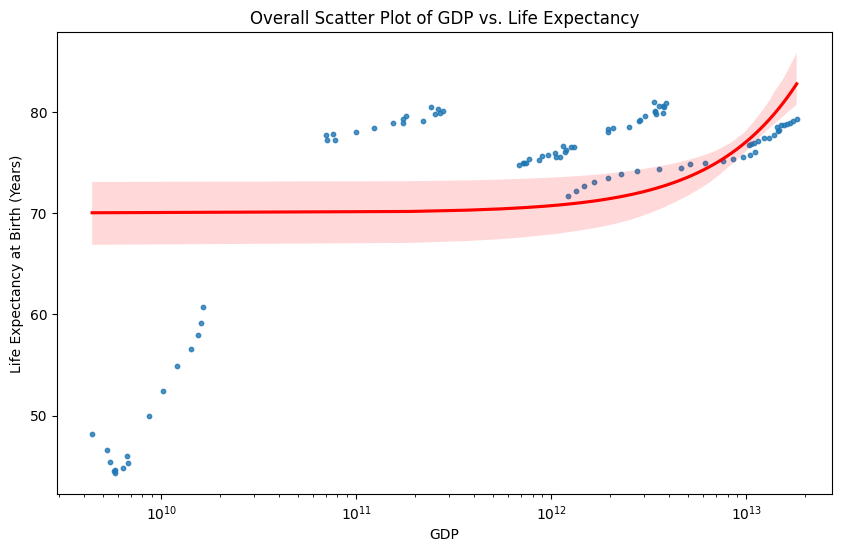

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xscale('log')
plt.title('Overall Scatter Plot of GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()

- **United States and China** show a strong positive correlation, indicating that higher GDP is associated with significantly higher Life Expectancy.

- **Zimbabwe** shows a different pattern, where GDP is much lower and Life Expectancy doesn't increase as dramatically, indicating other factors might be limiting life expectancy despite changes in GDP.

- **Other countries like Germany and Mexico** show moderate positive trends, but the impact of GDP on Life Expectancy is less pronounced compared to the U.S. and China.

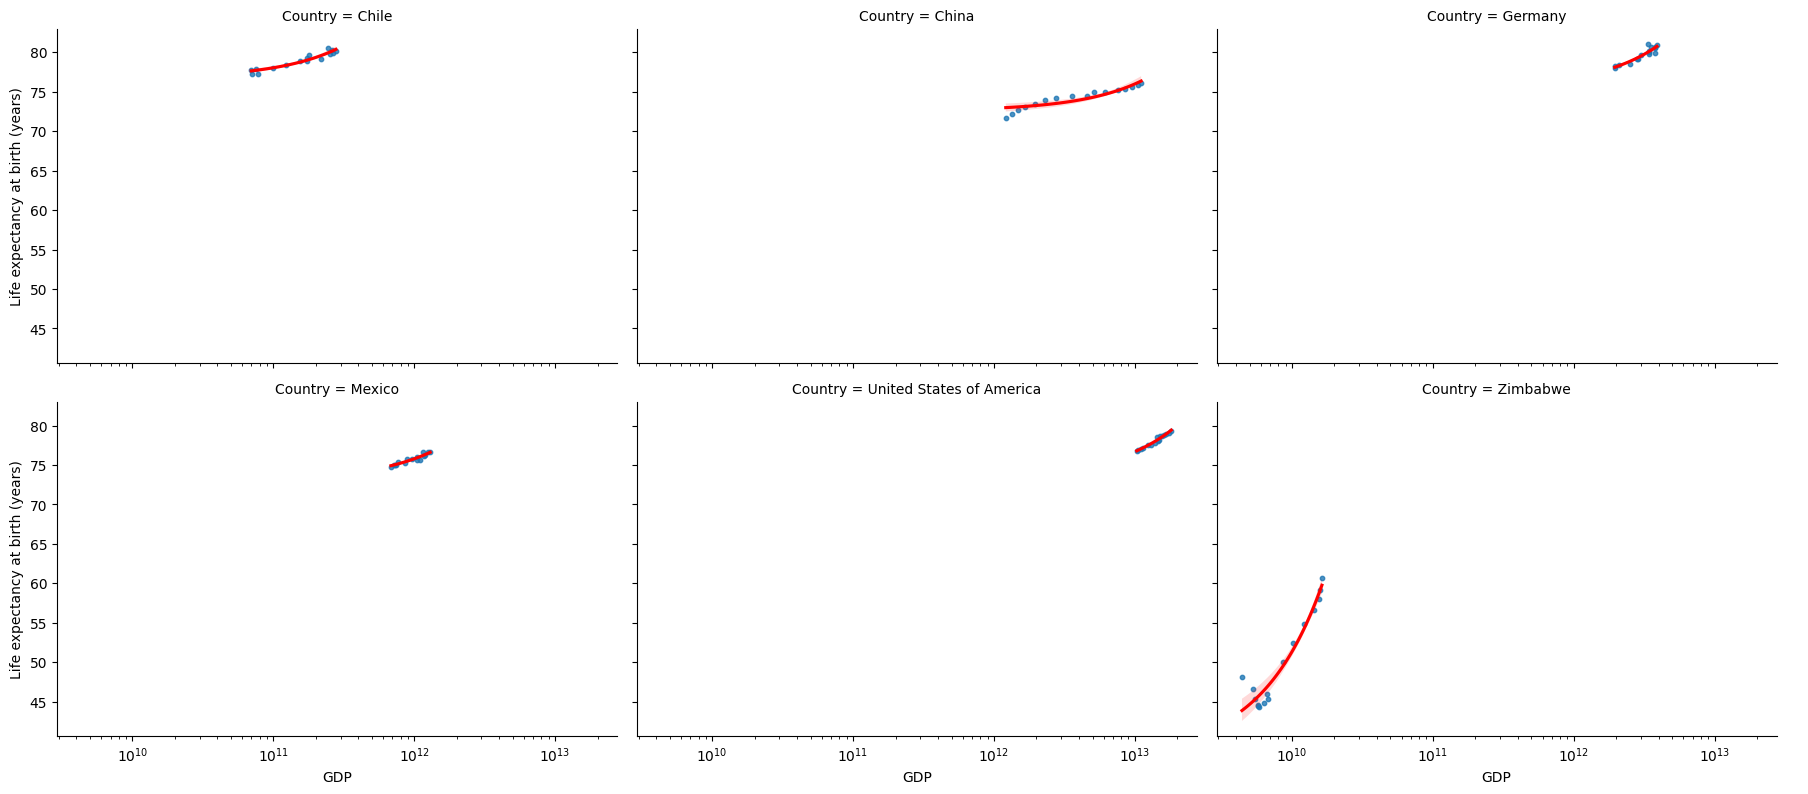

In [71]:
g = sns.FacetGrid(data, col='Country', col_wrap=3, height=4, aspect=1.5)
g.map(sns.regplot, 'GDP', 'Life expectancy at birth (years)', scatter_kws={'s':10}, line_kws={'color':'red'})
g.set(xscale='log')
g.add_legend()
plt.show()



 **Overall Relationship**:
   - The scatter plot and regression analysis showed a moderate positive correlation between GDP and Life Expectancy, suggesting that higher GDP tends to be associated with longer life expectancy. However, this relationship is not exceptionally strong, with a correlation coefficient of 0.34.




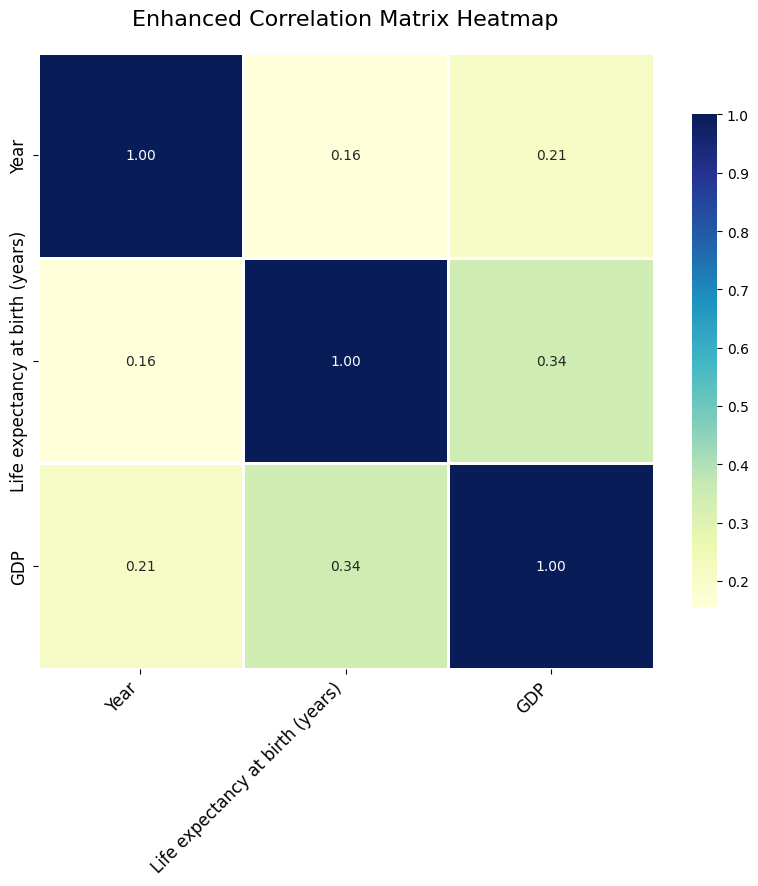

In [76]:
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=1, linecolor='white', cbar_kws={"shrink": .8}, square=True)

plt.title('Enhanced Correlation Matrix Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Fitting an OLS Linear Regression Model

In this section, I fit an Ordinary Least Squares (OLS) linear regression model to predict **"Life expectancy at birth (years)"** based on **GDP**. 
### Interpretation of Model Parameters

After fitting the OLS regression model, the following parameters were estimated:

- **Intercept**: \(70.05478\)
  - The intercept represents the estimated life expectancy when GDP is zero. In this context, it indicates that when GDP is at its baseline (or theoretically zero), the model predicts a life expectancy of approximately 70.05 years. However, it's important to note that interpreting the intercept in a meaningful way can be tricky, especially when GDP values close to zero are unrealistic for the countries in this dataset.

- **GDP Coefficient**: \(7.047546 \times 10^{-13}\)
  - The coefficient for GDP is a very small positive number, indicating that for each one-unit increase in GDP, the life expectancy increases by approximately \(7.047546 \times 10^{-13}\) years. This extremely small coefficient suggests that GDP has a very minimal impact on life expectancy in this model. This could imply that other factors might be more influential in determining life expectancy, or it might suggest that the relationship between GDP and life expectancy is not well captured by a simple linear model.

In [120]:
model = smf.ols("Q('Life expectancy at birth (years)') ~ GDP", data=data)
results = model.fit()
results.params

Intercept    7.005478e+01
GDP          7.047546e-13
dtype: float64

### Calculating Fitted Values and Residuals

After fitting the OLS regression model, it's time to calculate the **fitted values** and **residuals**:

- **Fitted Values**: These are the predicted values of life expectancy generated by the model based on the GDP values in the dataset. 

- **Residuals**: Residuals represent the difference between the actual observed values of life expectancy and the fitted (predicted) values. 

  The residuals help to assess how well the model is performing, as they indicate the discrepancies between the model's predictions and the actual data points.


In [115]:
fitted_values = results.predict(data)
residuals = data["Life expectancy at birth (years)"] - fitted_values

### Checking the Normality of Residuals

To evaluate the assumption of normality in our regression model, the next step is to plot a histogram of the residuals:

- **Histogram of Residuals**: This plot shows the distribution of the residuals. For a well-fitting linear regression model, the residuals should be approximately normally distributed.
- **Title**: The plot is titled "Normality" to indicate that it is being used to assess the normality assumption of the residuals.

This visualization helps us understand whether the residuals are normally distributed, which is a key assumption in linear regression analysis.


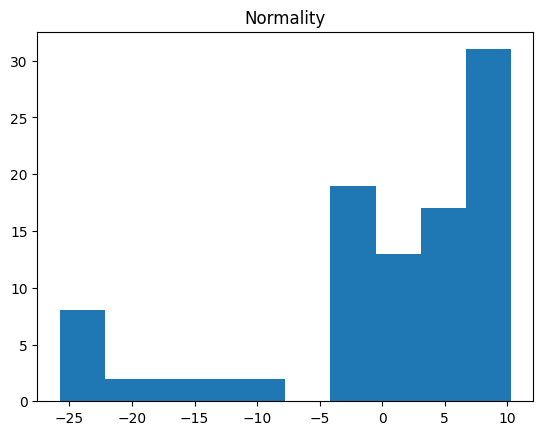

In [113]:
plt.hist(residuals)
plt.title("Normality")
plt.show()

### Q-Q Plot of Residuals

- **Q-Q Plot**: This plot compares the quantiles of the residuals with the quantiles of a standard normal distribution. If the residuals are normally distributed, the points should approximately follow the 45-degree line (which is added to the plot using `line='45'`).

This plot provides a visual check for normality, complementing the histogram. It helps us see if the residuals deviate from normality, particularly in the tails of the distribution.


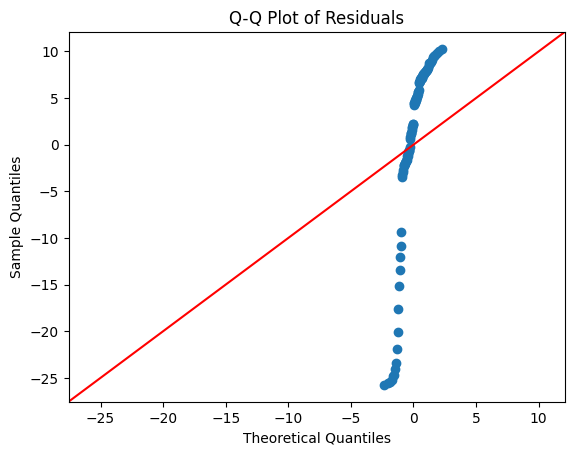

In [112]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

### Checking Homoscedasticity with Fitted Values vs. Residuals Plot

- **Homoscedasticity**: This assumption means that the residuals should have constant variance across all levels of the fitted values. In other words, the spread of residuals should be roughly the same for all predicted values of life expectancy.
  
- **Scatter Plot**: The scatter plot of fitted values vs. residuals helps visualize whether the variance of the residuals is constant. Ideally, the points should be randomly scattered around the horizontal axis (zero line), with no discernible pattern.
  
This plot allows us to check for any patterns or trends in the residuals that might indicate issues with heteroscedasticity (non-constant variance), which could affect the validity of the regression model.


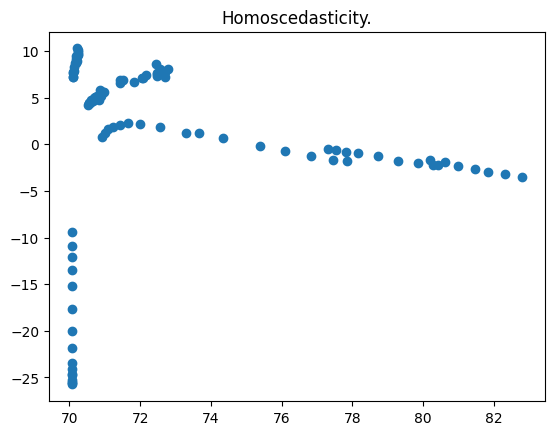

In [114]:
plt.scatter(fitted_values, residuals)
plt.title('Homoscedasticity.')
plt.show()

# Conclusion

In this project, we analyzed the relationship between GDP and life expectancy across six countries using a linear regression model. While the model provided some insights, including a consistent prediction of life expectancy around 70 years, the analysis revealed several limitations. The model's assumptions of normality and homoscedasticity were violated, indicating that GDP alone may not be a strong predictor of life expectancy. Future work could involve exploring additional variables, considering non-linear models, and performing further validation to improve the model's accuracy and robustness.

